In [2]:
! pip install scipy

[9.97319238e-01 9.57515409e-04]


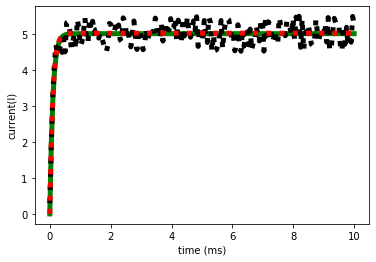

In [48]:
from math import *
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import random
from scipy.optimize import curve_fit
V = 5 #Initialize Voltage in LR circuit
R = 1 #Resistance in ohm
L = 1e-3 # inductance in henry
dp = 200 #data point
t = np.linspace(0,0.1,dp)
def deriv(y,t, V, L, R):  # creating function for differential equation
    dydt = (V - y*R)/L
    return dydt
I0 = 0 # Initial current
y_ode = odeint(deriv,I0 , t, args = (V,L,R) ) #solving differentia equatuin using scipy odeint solver

y_analytical = []  #create void array to store data from analytical soltion
for i in range(dp):
    ans = (1- exp(-R*t[i]/L))*V/R + random.uniform(-0.5,0.5) #adding noise value to analytical solution data
    y_analytical.append(ans)
plt.plot(t*100,y_ode, label = "ODE Solution", linestyle = "solid", linewidth = 5, color = "green") # plotting solution from ODE solver
plt.plot(t*100,y_analytical,label = "noise data",linestyle = "dotted", linewidth = 5, color = "black") #plotting noise data
plt.ylabel("current(I)") 
plt.xlabel("time (ms)")
#optimization using scipy.optimize curve_fit function
def func(t,a,b): #defining the desired function to fit the noise data
    N = np.zeros(dp)
    for i in range(dp):
        N[i] = (1 - exp(-a*t[i]/b))*V/a
    return N
params, cov = curve_fit(func,t,y_analytical, [1,1]) #implementing curve_fit function to find the optimize value of a = R, and L = b
print(params)
a = params[0]
b = params[1]
# plotting optimized function with respect to time
def function(a,b,t):
    fit = np.zeros(dp)
    for i in range(dp):
        fit[i] = (1 - exp(-a*t[i]/b))*V/a
    return fit
fit = function(a,b,t)
plt.plot(t*100, fit, label = "curve fit", linestyle = "dotted", linewidth = 5, color = "red")

    